## Problem Statement:
- In my project, I aim to address the challenge of understanding and grouping customers based on their transactional and behavioral data. The dataset includes various features such as spending patterns, credit card usage, and payment behaviors. Without proper segmentation, businesses face difficulties in tailoring their services, optimizing marketing efforts, and allocating resources effectively. This lack of understanding often results in missed opportunities to engage with customers meaningfully and maximize business outcomes.

# Objective:
- The main objective of my project is to develop a customer segmentation model that groups customers into distinct categories based on their financial activities and purchasing behaviors. By doing so, I aim to:

- Enable businesses to create targeted and personalized marketing strategies.
- Help improve customer satisfaction by understanding the specific needs and preferences of each segment.
- Assist in identifying high-value customers for loyalty programs and retention efforts.
- Optimize resource allocation for credit limits, payment terms, and promotional campaigns.
- Provide actionable insights that can be leveraged to drive data-driven decisions and enhance business performance.
- This segmentation model will be a valuable tool for businesses to better understand their customers and make informed, strategic decisions. It will - - serve as a key component of my project, showcasing the power of data analysis in solving real-world business challenges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer_Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.shape   # WE have a 8 thousand nine hundred and fifty samples and eighteen feautres.

(8950, 18)

### Dataset Features Explained:
The dataset contains various features that capture customer transactional and behavioral data. Below is an explanation of the key features:

---

1. **CUST_ID**: 
   - **Description**: A unique identifier assigned to each customer.
   - **Purpose**: Used to differentiate customers but not relevant for analysis or modeling.

2. **BALANCE**:
   - **Description**: The total credit card balance of the customer.
   - **Purpose**: Indicates the financial activity and credit card utilization of the customer.

3. **BALANCE_FREQUENCY**:
   - **Description**: How frequently the balance is updated (value between 0 and 1).
   - **Purpose**: Reflects the consistency of transactions on the credit card.

4. **PURCHASES**:
   - **Description**: The total amount of purchases made by the customer.
   - **Purpose**: Helps identify spending patterns and potential high-value customers.

5. **ONEOFF_PURCHASES**:
   - **Description**: The total amount of one-time purchases made by the customer.
   - **Purpose**: Shows the tendency for occasional large purchases versus consistent spending.

6. **INSTALLMENTS_PURCHASES**:
   - **Description**: The total amount of purchases made in installments.
   - **Purpose**: Highlights customers who prefer planned and recurring payments.

7. **CASH_ADVANCE**:
   - **Description**: The total amount of cash advances taken by the customer.
   - **Purpose**: Indicates reliance on credit cards for liquid cash needs, potentially a sign of financial stress.

8. **PURCHASES_FREQUENCY**:
   - **Description**: The frequency of making purchases (value between 0 and 1).
   - **Purpose**: Reflects how often customers use their cards for transactions.

9. **ONEOFF_PURCHASES_FREQUENCY**:
   - **Description**: Frequency of one-time purchases (value between 0 and 1).
   - **Purpose**: Highlights the preference for infrequent but significant purchases.

10. **PURCHASES_INSTALLMENTS_FREQUENCY**:
    - **Description**: Frequency of installment-based purchases (value between 0 and 1).
    - **Purpose**: Shows how often customers rely on installment payments.

11. **CASH_ADVANCE_FREQUENCY**:
    - **Description**: Frequency of cash advances (value between 0 and 1).
    - **Purpose**: Indicates dependency on cash withdrawals.

12. **CASH_ADVANCE_TRX**:
    - **Description**: Number of cash advance transactions.
    - **Purpose**: Complements `CASH_ADVANCE` by showing transaction counts rather than amounts.

13. **PURCHASES_TRX**:
    - **Description**: Number of purchase transactions.
    - **Purpose**: Shows how active customers are in making purchases.

14. **CREDIT_LIMIT**:
    - **Description**: The credit limit assigned to the customer.
    - **Purpose**: Indicates the financial capacity and creditworthiness of the customer.

15. **PAYMENTS**:
    - **Description**: The total payments made by the customer.
    - **Purpose**: Reflects repayment behavior and financial discipline.

16. **MINIMUM_PAYMENTS**:
    - **Description**: The minimum amount that the customer is required to pay.
    - **Purpose**: Provides insights into the customer's financial obligations and minimum repayment habits.

17. **PRC_FULL_PAYMENT**:
    - **Description**: Percentage of months where the customer pays the full balance.
    - **Purpose**: Highlights responsible credit card usage and repayment behavior.

18. **TENURE**:
    - **Description**: Number of months the customer has been using the credit card.
    - **Purpose**: Represents customer loyalty and long-term relationship with the credit card.

---

### How These Features Help in Segmentation:
- Features like **PURCHASES**, **BALANCE**, and **CREDIT_LIMIT** help identify high-spending customers versus low-spending ones.
- **CASH_ADVANCE** and related frequency features can segment customers based on dependency on cash withdrawals.
- Behavioral metrics like **PRC_FULL_PAYMENT** and **TENURE** can distinguish responsible users from those at financial risk.
- Frequency-based features like **PURCHASES_FREQUENCY** and **ONEOFF_PURCHASES_FREQUENCY** highlight activity patterns, crucial for understanding different spending behaviors.

By leveraging these features, meaningful customer groups can be identified for targeted business strategies. Let me know if you'd like further details or assistance with this!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isnull().sum()  # there are 1 null values in Credit Limit and 313 in minimum payments

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Univariate Analysis

### For continous variable
- **purpose** : to understand the distribution of a numerical features

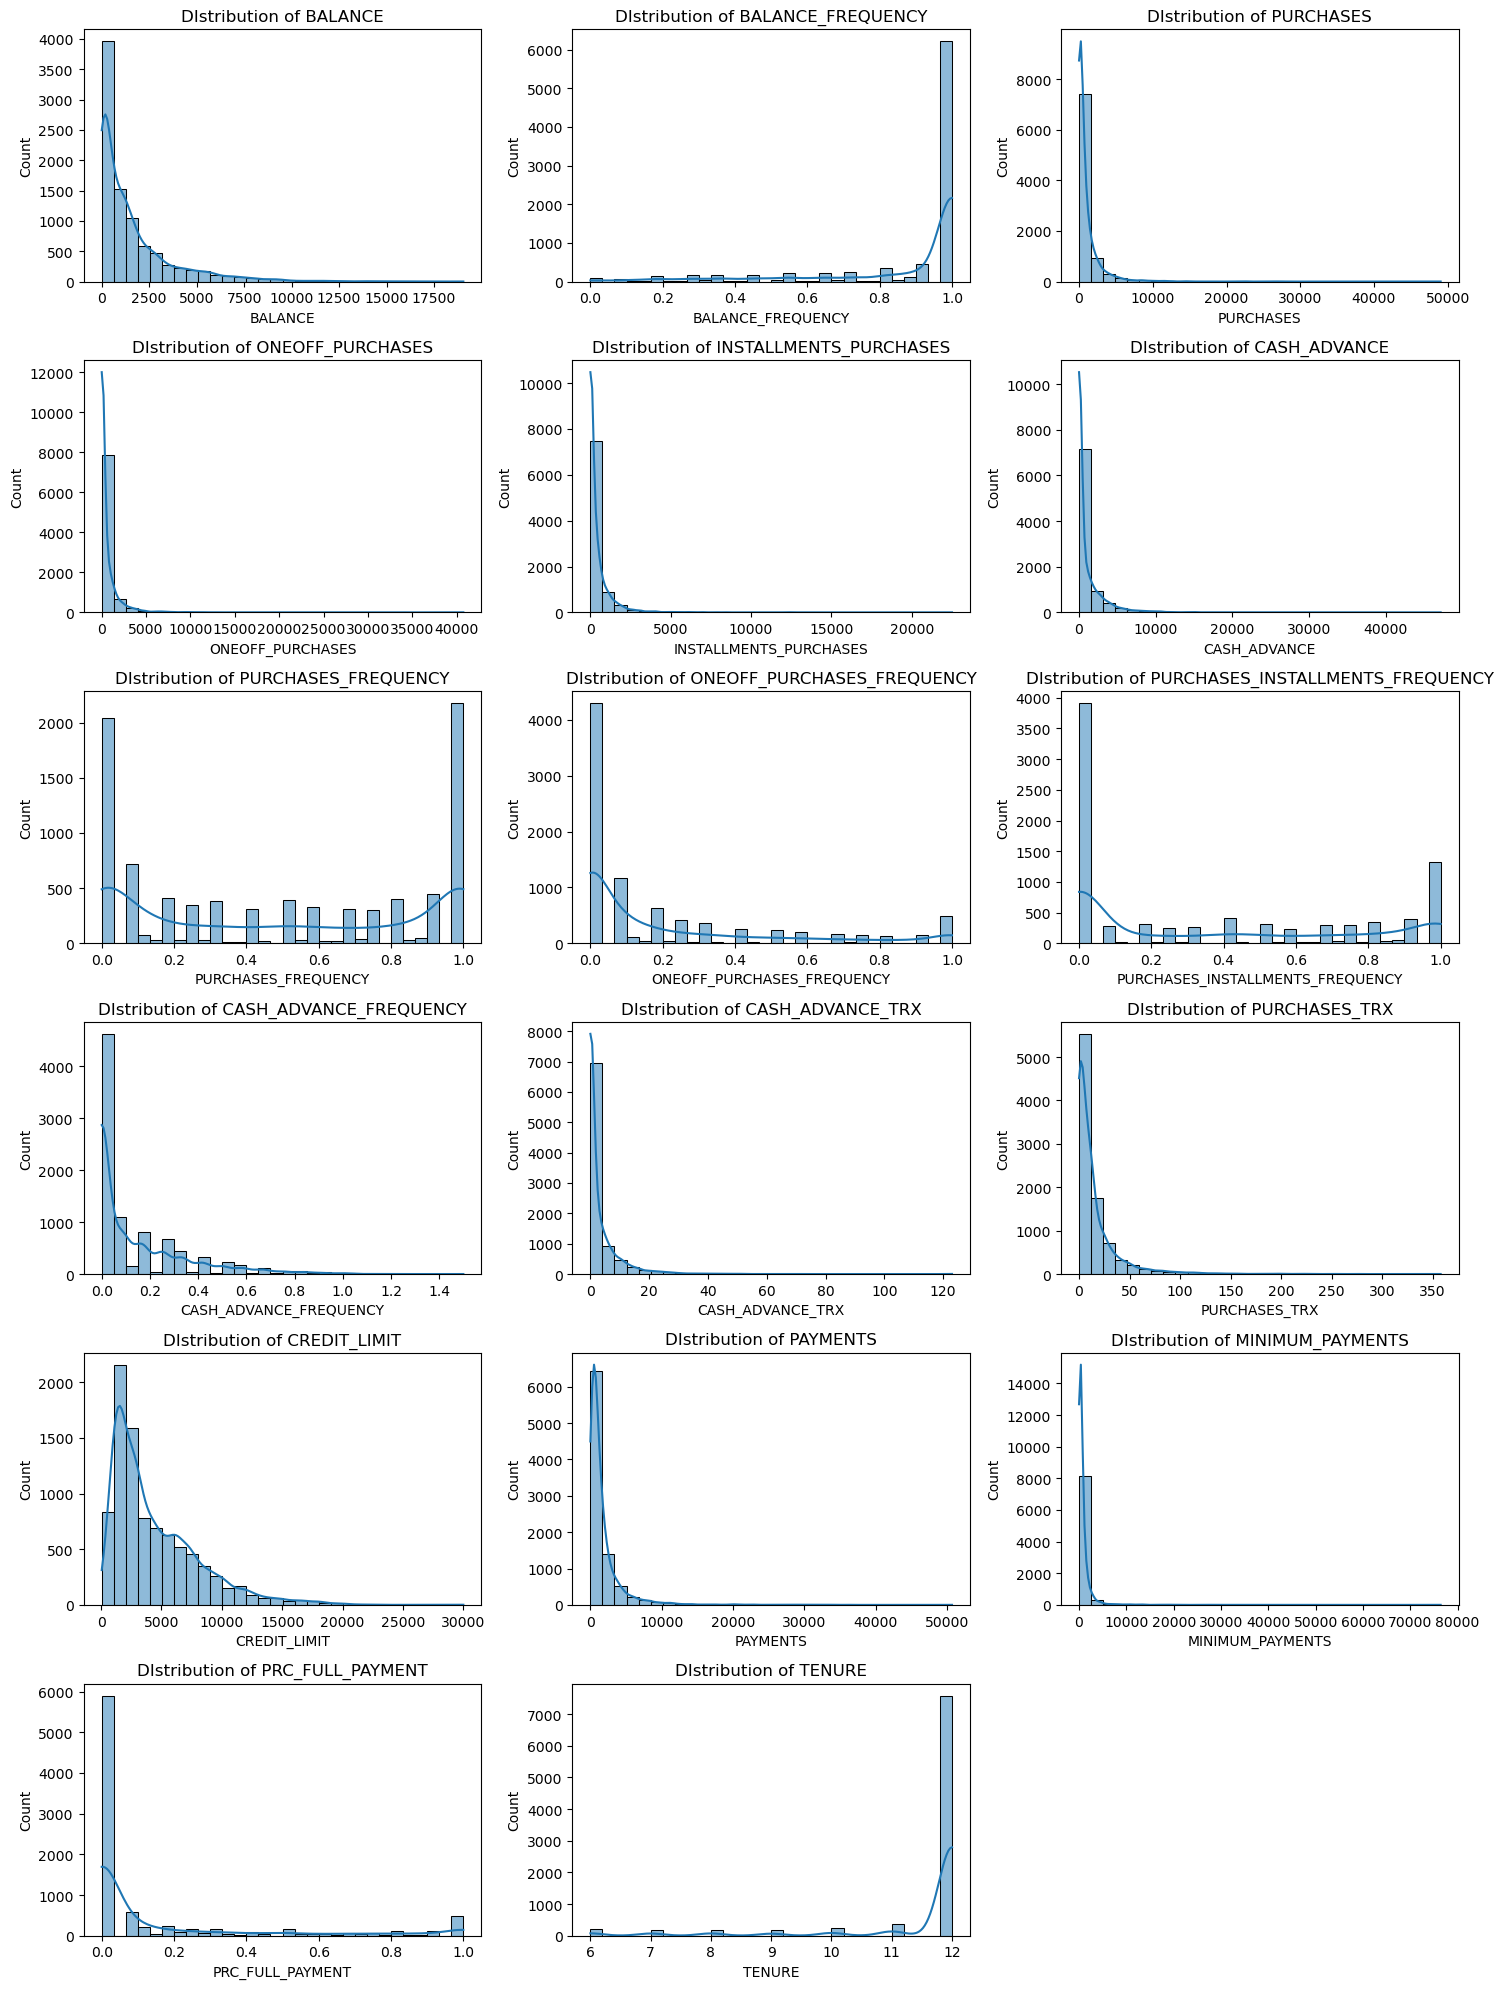

In [5]:
# Plot distribution
numerical_cols= df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15,20))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(6,3,i)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f"DIstribution of {col}")

plt.tight_layout()
plt.show()

Based on the histograms presented:

1. **BALANCE**: The distribution is heavily right-skewed, with most customers having lower balances, indicating a majority of customers maintain smaller credit card balances.

2. **BALANCE_FREQUENCY**: Almost all customers have a balance frequency close to 1, implying frequent updates to their credit card balances.

3. **PURCHASES**: Right-skewed, suggesting most customers make relatively low total purchases, with a small number of customers making significantly higher purchases.

4. **ONEOFF_PURCHASES**: Similar to `PURCHASES`, the data is skewed, showing that one-time purchases are concentrated among a few high-value customers.

5. **INSTALLMENTS_PURCHASES**: Most customers have very low or no installment purchases, with a few customers making high installment-based purchases.

6. **CASH_ADVANCE**: A large proportion of customers rarely use cash advances, though some rely heavily on this feature.

7. **PURCHASES_FREQUENCY**: Fairly uniform distribution, indicating a mix of frequent and infrequent purchasers.

8. **ONEOFF_PURCHASES_FREQUENCY**: Most customers have a frequency near 0, indicating they rarely make one-off purchases.

9. **PURCHASES_INSTALLMENTS_FREQUENCY**: A significant portion of customers frequently use installment purchases, with values skewed toward 0.8-1.

10. **CASH_ADVANCE_FREQUENCY**: The majority rarely use cash advances, reflected by values clustered near 0.

11. **CASH_ADVANCE_TRX**: Most customers have a low number of transactions for cash advances, with few outliers.

12. **PURCHASES_TRX**: Right-skewed, showing that most customers have a low count of purchase transactions.

13. **CREDIT_LIMIT**: Skewed toward smaller credit limits, with a small portion of customers having significantly higher limits.

14. **PAYMENTS**: Most customers make lower payments, but some make very high payments, indicating wide variation.

15. **MINIMUM_PAYMENTS**: Highly skewed, with many customers close to their minimum payment amounts.

16. **PRC_FULL_PAYMENT**: Most customers rarely pay their full balance, with values concentrated near 0.

17. **TENURE**: Almost all customers have a tenure of 12 months, indicating most have been using their credit card for the full observation period.



###  Key Insights from above histogram 

1. **High-Value Customers**:
   - Most customers have low balances and purchases, but a small group spends significantly more and has higher balances. These are **high-value customers** who can be targeted with premium rewards and personalized offers.

2. **Spending Behavior**:
   - Features like `BALANCE`, `PURCHASES`, and `CREDIT_LIMIT` highlight differences in spending capacity:
     - **High spenders** are ideal for exclusive marketing campaigns.
     - Customers with high balances and low credit limits may be nearing financial limits, requiring caution.

3. **Cash Advances**:
   - Most customers rarely use cash advances, suggesting they rely on credit cards for purchases, not emergency cash.
   - Those who frequently use cash advances might be under **financial stress**, posing higher credit risk.

4. **Installment Payments**:
   - Many customers prefer installments for their purchases, indicating a focus on **budget-friendly payment options**.
   - Offering installment-based plans (e.g., no-interest financing) could drive more engagement.

5. **Repayment Habits**:
   - Few customers pay their full balance regularly (`PRC_FULL_PAYMENT` is low), while many make only minimum payments. This signals:
     - **Profit opportunity** from interest accrual for issuers.
     - Potential credit risk for customers relying on minimum payments.

6. **Customer Tenure**:
   - Most customers have been with the credit card for 12 months, showing stable customer retention. Further analysis can distinguish loyal, high-value customers from less active ones.

---

### Business Implications:
- **Target High Spenders**: Create loyalty rewards and personalized campaigns for high-value customers.
- **Manage Risks**: Monitor customers who rely on cash advances or make only minimum payments to prevent credit risks.
- **Promote Installments**: Offer installment plans to attract budget-conscious customers.
- **Engage Low-Activity Customers**: Use cashback or discounts to increase activity among less active users.

These insights can help businesses improve customer segmentation, optimize resources, and enhance revenue.

## For Categorical Variables:
- **Purpose:**

- Analyze the frequency of categorical variables.



In [6]:
df["CUST_ID"].nunique()    # there are all CUST_ID have unique

8950

# Bivariate Analysis
- **Numerical** vs **Numerical**

- **Purpose**
- Explore the relationship between pair of numerical features

In [7]:
data=df.drop("CUST_ID",axis=1)


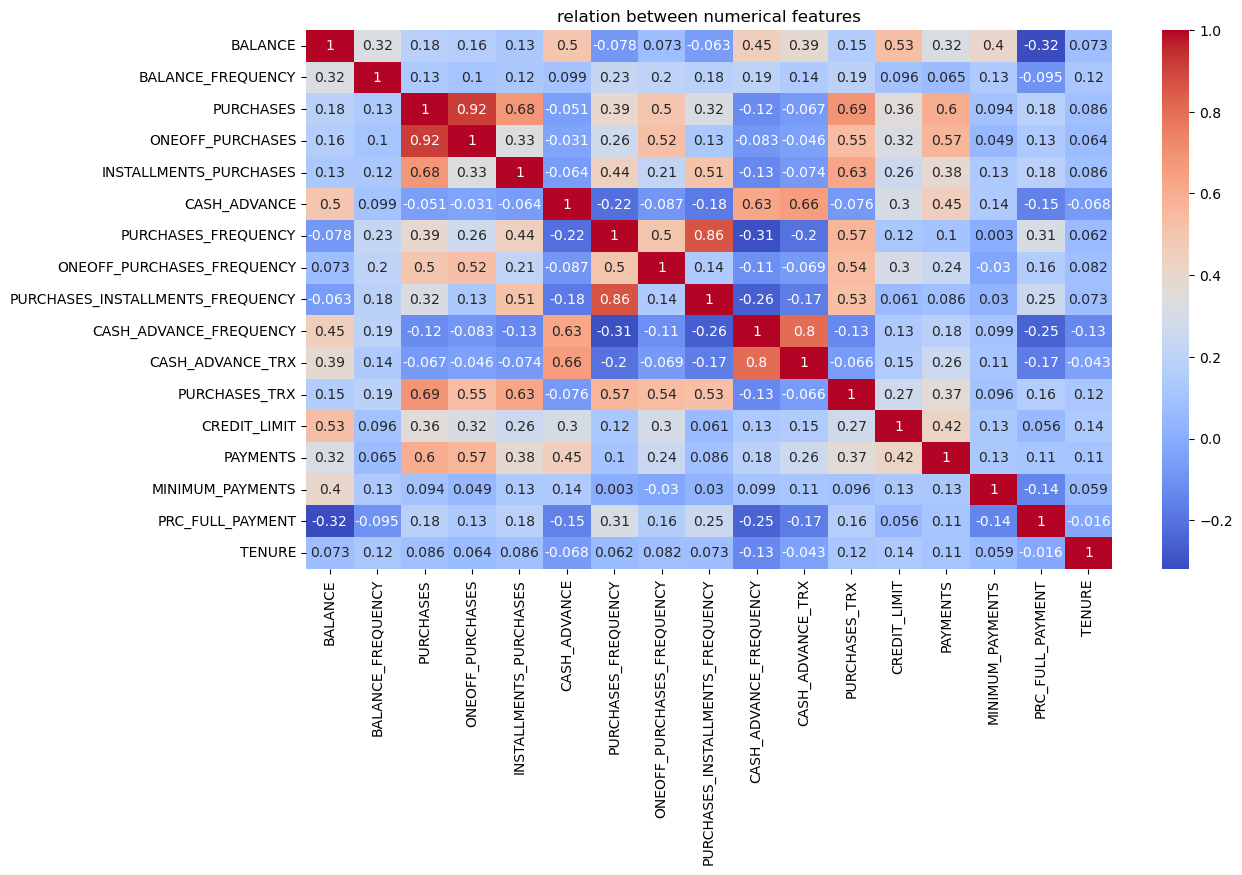

In [8]:
correlation=data.corr()
plt.figure(figsize=(13,7))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("relation between numerical features")
plt.show()

### Key Insights from the Correlation Heatmap:

1. **Strong Positive Correlations**:
   - `PURCHASES` and `ONEOFF_PURCHASES` (0.92): Customers with high total purchases often make large one-time purchases.
   - `PURCHASES` and `PURCHASES_TRX` (0.69): Higher total purchases are associated with a higher number of transactions.
   - `INSTALLMENTS_PURCHASES` and `PURCHASES_TRX` (0.63): Frequent transactions are linked to installment-based purchases.
   - `CREDIT_LIMIT` and `BALANCE` (0.53): Customers with higher credit limits tend to have higher balances.

2. **Moderate Positive Correlations**:
   - `PAYMENTS` and `PURCHASES` (0.57): Customers making more payments also tend to spend more.
   - `MINIMUM_PAYMENTS` and `BALANCE` (0.4): Higher balances often lead to higher minimum payments.

3. **Negative Correlations**:
   - `PRC_FULL_PAYMENT` and `BALANCE` (-0.32): Customers who frequently pay their balances in full tend to have lower balances.
   - `PRC_FULL_PAYMENT` and `MINIMUM_PAYMENTS` (-0.25): Customers who pay in full rarely make just the minimum payment.

4. **Cash Advances**:
   - `CASH_ADVANCE` and `BALANCE` (0.5): Customers taking more cash advances often maintain higher balances.
   - `CASH_ADVANCE` and `CASH_ADVANCE_TRX` (0.8): High cash advance amounts are strongly linked to a higher number of cash advance transactions.

---

### Simplified Business Insights:
1. **Segment High Spenders**:
   - Customers with high `PURCHASES` and frequent `PURCHASES_TRX` can be targeted for rewards and cashback programs.

2. **Monitor Cash Advance Users**:
   - Customers heavily relying on cash advances may need financial assistance or adjusted credit terms.

3. **Identify Responsible Payers**:
   - Customers with high `PRC_FULL_PAYMENT` are likely low-risk and can be offered premium products or services.

4. **Focus on Installment Purchasers**:
   - Promote installment-based offers to customers with frequent `PURCHASES_TRX` and high `INSTALLMENTS_PURCHASES`.

This heatmap reveals strong relationships that can guide segmentation and targeted strategies

In [9]:
df.head(1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


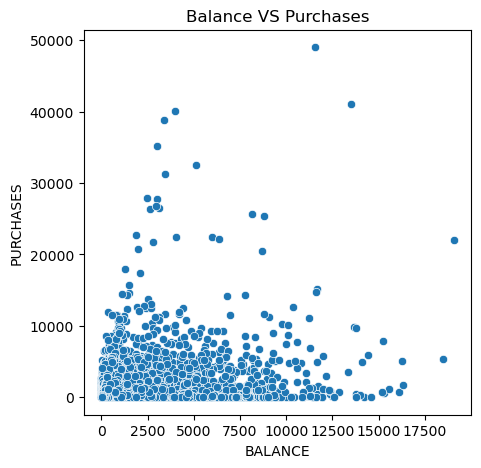

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="BALANCE",y="PURCHASES",data=df)
plt.title("Balance VS Purchases")
plt.show()

### Insights from Scatter Plot:
1. **Majority Cluster**: Most customers have balances under $5,000 and purchases under $10,000, indicating moderate activity.
2. **High Balance, Low Purchases**: Some customers maintain high balances (>$10,000) with lower spending, possibly indicating overuse of credit.
3. **Outliers**: Few customers show extremely high purchases (>$40,000) or balances, representing high-value or high-risk profiles.
4. **Low Engagement**: Many customers have both low balances and purchases, showing minimal card usage.

# Categorical vs continoues

- **Purpose:**

- Examine how numerical features vary across categorical groups.


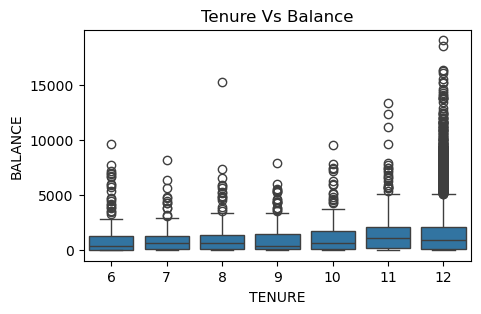

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(x='TENURE',y='BALANCE',data=df)
plt.title('Tenure Vs Balance')
plt.show()

### Insights from Box Plot (Tenure vs Balance):
1. **Higher Balances at 12 Months**: Customers with a tenure of 12 months have the highest balances, including many outliers.
2. **Consistent Median Balances**: Across all tenures, the median balance remains relatively stable.
3. **Outliers Across Tenures**: All tenure groups show some customers with exceptionally high balances, indicating a few high-balance users in each group.
4. **Concentration at Low Balances**: Most customers across all tenures maintain relatively low balances, below $5,000.

# Multivariate Analysis

- **Purpose:**

- Visualize pairwise relationships between multiple variables.

<Figure size 700x1000 with 0 Axes>

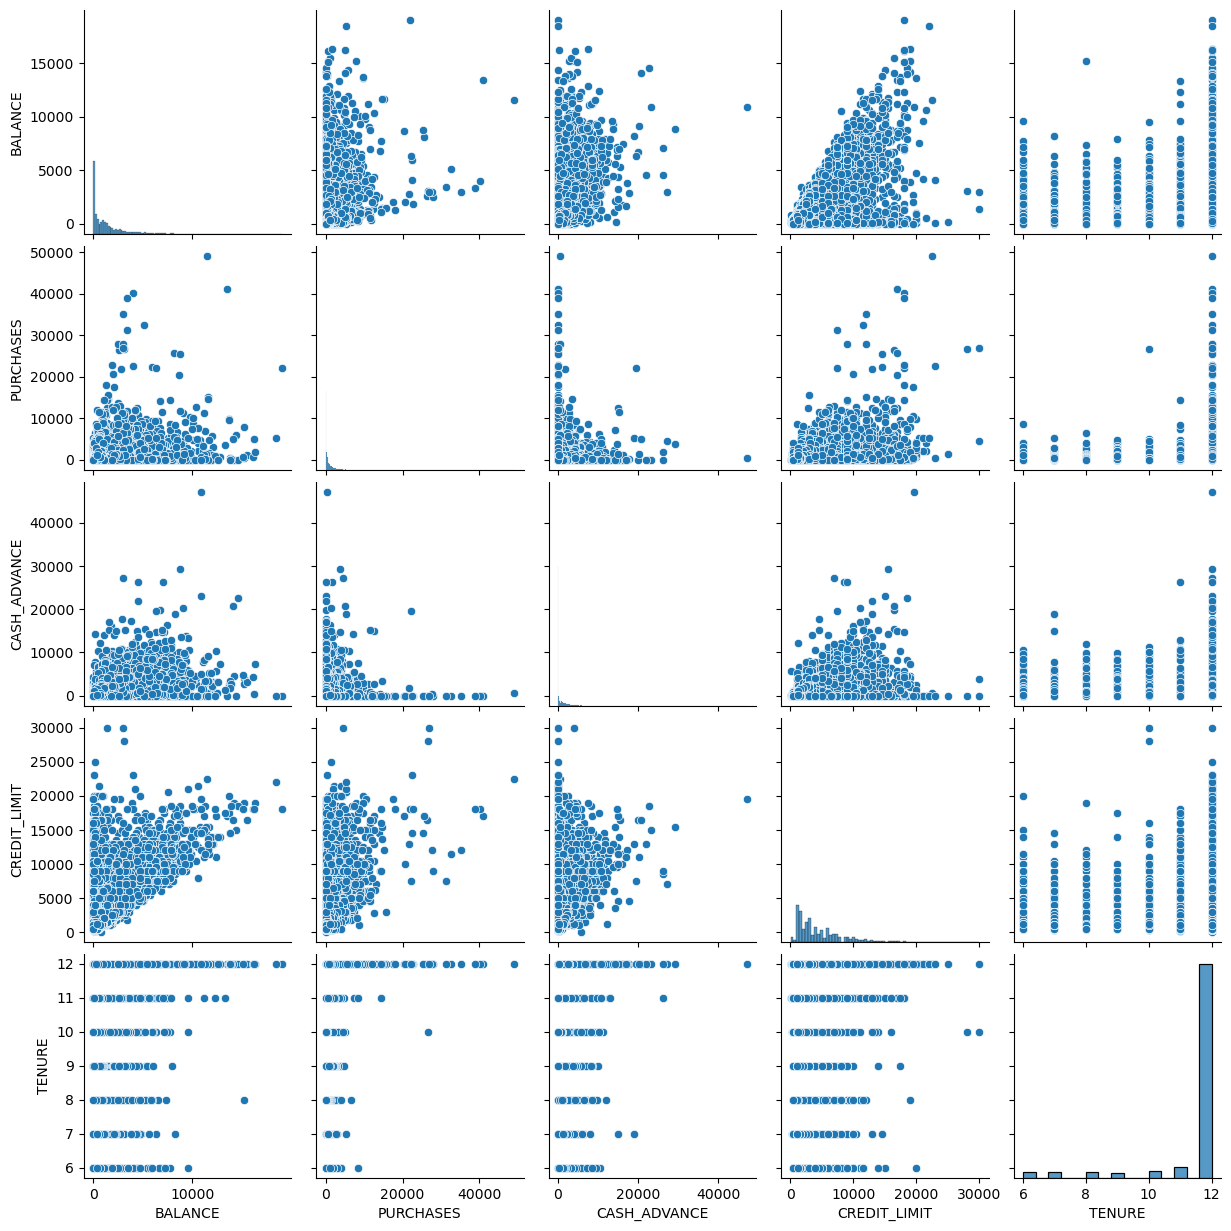

In [22]:
# pairplot for selected features
plt.figure(figsize=(7,10))
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'TENURE']
sns.pairplot(df[selected_features])
plt.show()

### Insights from the Pair Plot:

1. **Balance and Credit Limit**:
   - Strong positive correlation: Higher credit limits are associated with higher balances.

2. **Purchases and Balance**:
   - Positive but scattered relationship: Customers with higher balances tend to make more purchases, though with significant variability.

3. **Cash Advance Usage**:
   - Weak correlation with purchases or balances: Customers using cash advances do not necessarily spend more.

4. **Tenure**:
   - Minimal impact on other variables: No strong relationship between tenure and spending, balance, or credit limit.

5. **Outliers**:
   - Several outliers exist in all variables, particularly in purchases and cash advances, indicating high-value or high-risk customers.

- These insights highlight spending patterns and relationships between key financial behaviors.